*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Regression using Statsmods Formula**

> Pemblokiran indentasi



In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


In [ ]:
model = smf.ols(formula='pie_sales ~ price + advertising', data=df)
results_formula = model.fit()
results_formula.params

Intercept      306.526193
price          -24.975090
advertising     74.130957
dtype: float64

In [ ]:
x_surf, y_surf = np.meshgrid(np.linspace(df.price.min(), df.price.max(), 100),np.linspace(df.advertising.min(), df.advertising.max(), 100))
onlyX = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)


In [ ]:
## convert the predicted result in an array
fittedY=np.array(fittedY)

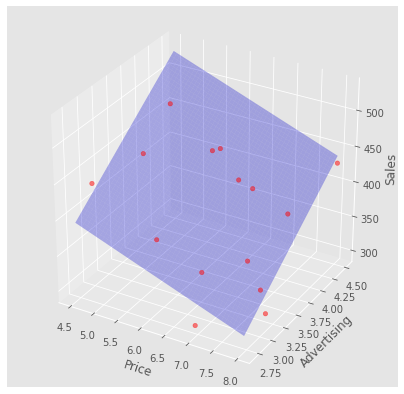

In [ ]:
# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Sales')
plt.show()


'''
Berdasarkan visualisasi 3d dari Multiple Linear Regression penjualan akan meningkat seiring dengan peningkatan 
pengiklanan dan pengurangan  harga, akan tetapi hasil prediksi tidak mengenai banyak titik dari data penjualan pie,
ketidakakuratan model tersebut adalah akibat dari kekurangan jumlah sampel dari data penjualan'''

## **Regression Using Scikit**

In [13]:
X = df[["price","advertising"]]
Y = df[["pie_sales"]]

In [15]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [306.52619328]
Coefficients: 
 [[-24.97508952  74.13095749]]


''' Intercept menunjukan nilai variabel dependen(Y) yaitu penjualan pie ketika variabel independen(X) yaitu pengiklanan dan harga pie bernilai 0, pada prakteknya pengiklanan dan harga pie tidak akan bernilai 0.

Koefisien menunjukan pengaruh dari peningkatan tiap unit variabel X dimana tiap kenaikan harga pie memiliki pengaruh terhadap penjulan sebesar -24.97508952 dan tiap kenaikan unit pengiklanan akan mengakibatkan penjualan meningkat sebesar 74.13095749'''

### **Regression using Statsmodels**

In [12]:
X = df[["price","advertising"]]
y = df[["pie_sales"]]
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


In [10]:
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        10:44:00   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

''' Nilai R-Squared sebesar 0,521 dapat diartikan bahwa variabel X dan Y memiliki hubungan linear yang lemah. 

### Uji T
dengan menggunakan tingkat kepercayaan 95% dengan nilai alfa 0.5, karena uji dilakukan dengan two tail maka alfa yang digunakan adalah 0.5/2 = 0.025
jumlah sampel 15 
derajat kebebasan (n-k-1) = 15-2-1 =12
batas nilai t nya adalah 0.217881
Dapat dilakukan analisis korelasi dengan melihat nilai T dari variabel harga yaitu -2.306 
(-2.306<0.217881) yang berarti penjualan dan harga memiliki korelasi negatif, dan pengiklanan dengan nilai t 2.855 
(2.855>217881) yang berarti memiliki korelasi positif. 

### uji F
d1 = 2
d2 = 12
dengan menggunakan tabel F didapatkan nilai 3.89.
nilai yang F-Static yang didapatkan dari statsmod adalah 
6.539
(6.539>3.89)
maka dapat disimpulkan bahwa pengiklanan dan harga pie memiliki pengaruh signifikan terhadap penjualan 
